Coursework 1 : Learning learning, from scratch

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')
from collections import Counter
import math 


Mounted at /content/drive


In [ ]:
def loadMnist():
  #Load MNIST dataset

  X_train_mnist = np.load('WRITEYOURPATH/mnist_train_samples.npy')
  Y_train_mnist = np.load('WRITEYOURPATH/mnist_train_labels.npy')

  X_val_mnist = np.load('WRITEYOURPATH/mnist_val_samples.npy')
  Y_val_mnist = np.load('WRITEYOURPATH/mnist_val_labels.npy')

  return X_train_mnist, Y_train_mnist, X_val_mnist, Y_val_mnist

def loadIris():
  #Load IRIS dataset

  X_train_iris = np.load('WRITEYOURPATH/iris_train_samples.npy')
  Y_train_iris = np.load('WRITEYOURPATH/iris_train_labels.npy')

  X_val_iris = np.load('WRITEYOURPATH/iris_val_samples.npy')
  Y_val_iris = np.load('WRITEYOURPATH/iris_val_labels.npy')

  return X_train_iris, Y_train_iris, X_val_iris, Y_val_iris

In [ ]:
def accuracy(Y_test, y_pred):
    
    accuracy = np.sum(Y_test == y_pred)
    accuracy /= Y_test.shape[0]
    
    return accuracy

def precision(Y_test, y_pred):
    
    mask = (Y_test == 1)
    
    precision = np.sum(Y_test[mask] == y_pred[mask])
    precision /= np.sum(mask.astype(np.float64))
    
    return precision

def true_positive(Y_test, y_pred):
    mask = (Y_test == 1)
    
    tp = (Y_test[mask] == y_pred[mask]).sum()
    
    return tp.item()

def true_negative(Y_test, y_pred):
    mask = (Y_test == 0) | (Y_test == -1)
    
    tn = (Y_test[mask] == y_pred[mask]).sum()
    
    return tn.item()

def false_negative(Y_test, y_pred):
    mask = (y_pred == 0) | (y_pred == -1)
    
    tn = (Y_test[mask] != y_pred[mask]).sum()
    
    return tn.item()

def false_positive(Y_test, y_pred):
    mask = (y_pred == 1)
    
    tn = (Y_test[mask] != y_pred[mask]).sum()
    
    return tn.item()

def plot_confusion_matrix(Y_test, y_pred):
    
    tp = true_positive(Y_test, y_pred)
    tn = true_negative(Y_test, y_pred)
    fp = false_positive(Y_test, y_pred)
    fn = false_negative(Y_test, y_pred)
    
    cf = np.array([[tn, fn], [fp, tp]])
    
    fig, ax = plt.subplots()

    ax.matshow(cf, cmap=plt.cm.Blues)

    for i in range(2):
        for j in range(2):
            c = cf[j,i]
            ax.text(i, j, str(c), va='center', ha='center')

    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.show()



1/ Line Fitting

a)

In [ ]:
def nsolve(X,y):
  X_new = np.hstack([np.ones([X.shape[0],1]), X]) #We add the bias term
  X_transpose = np.transpose(X_new)
  w = np.linalg.inv(X_transpose.dot(X_new)).dot(X_transpose.dot(y)) #General way (When Matrix is invertible)
  # w = np.linalg.pinv(X_new).dot(y) #If the matrix is not invertible
  return w


b)

Weights : [-0.30195036  0.7925747  -0.72158044  1.37750519]
L2 Loss :  0.14800261232026266


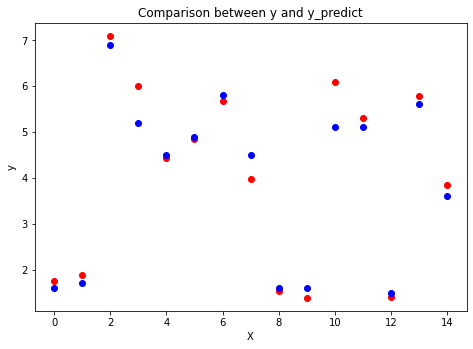

In [ ]:
def lineFit(X,y):
  w = nsolve(X,y)
  y_pred = w[0] + np.dot(X, w[1:])
  return y_pred

  X_train_iris, Y_train_iris, X_val_iris, Y_val_iris = loadIris()

  #We set the features(all X's except for petal length) and the labels(represented by petal length) :
  X_iris_features = X_train_iris[:,[0,1,3]]
  X_iris_labels = X_train_iris[:,2]

  #We calculate the prediction :
  w = nsolve(X_iris_features,X_iris_labels) #We get the optimal weights using the training dataset
  print('Weights :',w)
  prediction = w[0] + np.dot(X_val_iris[:,[0,1,3]], w[1:]) #We use the weights with the parameters in the validation dataset (to predict the resulting scoring function y)

  #We print out the L2 Loss :
  true_y = X_val_iris[:,2]
  print('L2 Loss : ', np.sum((prediction-true_y)**2)/true_y.size)

  # Let's plot the correlation between y and the predicted y for 15 samples (size of validation dataset):
  fig=plt.figure()
  ax=fig.add_axes([0,0,1,1])
  x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
  y = X_val_iris[:,2]
  ax.scatter(x, prediction, color='r')
  ax.scatter(x, y, color='b')
  ax.set_xlabel('X')
  ax.set_ylabel('y')
  ax.set_title('Comparison between y and y_predict')
  plt.show()

c) 

Weights : [-2.16925749  1.7141263  -0.48353269 -0.05718935 -0.06412113 -0.08309469
  0.00445281  0.49551202 -0.33445634 -0.13041309]
L2 loss :  0.0743918345416789


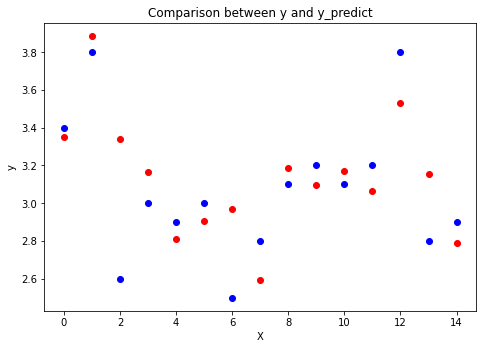

In [ ]:
#Preprocessing the data...
def process_data(X_new):
  X_features = np.ones((X_new.shape[0],10))
  X_features[:,1] = X_new[:,0] #x 
  X_features[:,2] = X_new[:,1] #y
  X_features[:,3] = X_new[:,2] #z
  X_features[:,4] = (X_new[:,0]**2) #x**2
  X_features[:,5] = (X_new[:,0]*X_new[:,1]) #xy
  X_features[:,6] = (X_new[:,1]**2) #y**2
  X_features[:,7] = (X_new[:,1]*X_new[:,2]) #yz
  X_features[:,8] = (X_new[:,2]**2) #z**2
  X_features[:,9] = (X_new[:,2]*X_new[:,0]) #zx
  return X_features

def polyFit(X,y):
  X = process_data(X)
  #We calculate the weights...
  w = np.linalg.inv((X.T).dot(X)).dot((X.T).dot(y))
  #Let's predict y :
  prediction = np.dot(X,w)
  return w, prediction

  #Calculating the weights and the prediction on the training set...
  w_opt, predict_training = polyFit(X_train_iris[:,[0,2,3]],X_train_iris[:,1])

  features = process_data(X_val_iris[:,[0,2,3]]) #Features x,y,z

  #Predict the validation dataset...
  print('Weights :',w_opt)
  predict_val = w_opt[0] + np.dot(features[:,1:],w_opt[1:])


  #Calculating the L2 loss...
  Loss = np.sum((predict_val - X_val_iris[:,1])**2))/15
  print('L2 loss : ',Loss)



  # Let's plot the correlation between y and the predicted y for 15 samples (size of validation dataset):
  fig=plt.figure()
  ax=fig.add_axes([0,0,1,1])
  x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
  y = X_val_iris[:,1]
  ax.scatter(x, predict_val, color='r')
  ax.scatter(x, y, color='b')
  ax.set_xlabel('X')
  ax.set_ylabel('y')
  ax.set_title('Comparison between y and y_predict')
  plt.show()


2/Clustering

a)

In [ ]:
def pca(X, ndims):
  X_center = X - X.mean(axis=0)
  if ndims == None:
    U, S, Vt = np.linalg.svd(X_center,full_matrices=True)
    return X_center, Vt
  U, S, Vt = np.linalg.svd(X_center,full_matrices=False)
  return X_center, Vt[:ndims]

In [ ]:
#We display the top 10 Components for the Training dataset
V, Components = pca(X_train_mnist, 10)
for i in range(10):
  image = Components[i,:].reshape((28, 28))
  fig = plt.figure
  plt.imshow(image, cmap='gray')
  plt.show()

In [ ]:
X_train_mnist, Y_train_mnist, X_val_mnist, Y_val_mnist = loadMnist()

#We compute the reconstructed images using all components
n_components = Components.shape[0]
X = X_val_mnist - X_val_mnist.mean(axis=0)
U, S, Vt = np.linalg.svd(X,full_matrices=True)
sigma = np.zeros((7000, 784))
sigma[:784, :784] = np.diag(S)
# sigma = sigma[:,:n_components]
# Vt = Vt[:n_components,:]
reconstruct = (U @ sigma @ Vt) + X_val_mnist.mean(axis=0)

In [ ]:
#Displaying the reconstructed images...
for i in range(10):
  image = reconstruct[i,:].reshape((28,28))
  print('The expected digit is : ',Y_val_mnist[i])
  fig = plt.figure
  plt.imshow(image, cmap='gray')
  plt.show()

b)

The kmeans function should have 3 input variables, which are the input data (the data we want to analyze), the number of iterations, and the number of clusters k (centroids). The latter is a hyperparameter that we use to classify our data into k regions. As we will be starting our algorithm with random clusters initial values, we have to repeat our algorithm multiple times and compare the last clustering with a new one, and if the new clustering has a lower variance, we will choose it. Finally, we output the centroid points that resulted with the lower variance.

In [ ]:
def distance(a,b):
  distance = numpy.linalg.norm(a-b)
  return distance



def kmeans(X, iterations, clusters):
  max_value = np.max(X, axis=0)
  min_value = np.min(X, axis=0)
  length = max_value-min_value
  distances = np.array(X.shape[1])

  #Initialise the labels...
  labels = np.random.randint(0,clusters, X.shape[0])
  #Initialise centroids...
  centroids = (np.random.uniform(0,1,X.shape[1])*length)+min_value

  for i in range(iterations):
    for j in range(X.shape[0]):
      distances[j] = distance(X[j],centroids[j])
      opt_label = np.argmin(distances[j])
    
    if ((opt_label == labels).all()):
      labels = opt_label
    else:
      labels = opt_label
      for i in range(clusters):
        centroids[i] = np.mean(X[i])

  return labels, centroids




c)


We can say that KMeans is a version of PCA that have more sparsity. Indeed, K means is itself a least squares optimisation problem as it deals with the euclidean distance. PCA is also dealing with least square optimization but using vector calculus. We should see that KMeans and PCA algorithm are very close but not exactly identical as KMeans is less modular with its constraints(centroids).

3/ Linear Classification

a)

In [ ]:
X_train_iris, Y_train_iris, X_val_iris, Y_val_iris = loadIris()

In [ ]:
def lclass(examplesA, examplesB, testExamples):

  A_label = np.ones((examplesA.shape[0],1))
  B_label = np.zeros((examplesB.shape[0],1))
  # labels = np.vstack(A_label,B_label)

  labels = np.append(A_label, B_label, axis=0)

  X = np.vstack((examplesA, examplesB))
  w = nsolve(X,labels)
  
  print(Y_val_iris)
  X_test = testExamples[:,:-1]
  y_predict = w[0] + (X_test.dot(w[1:]))
  print(y_predict)
  for i in range(testExamples.shape[0]):
    if (y_predict[i] < 0.5):
      y_predict[i] = 0
    else:
      y_predict[i] = 1

  y_predict = y_predict.reshape(y_predict.shape[0],)
  return y_predict


b)

In [ ]:
#Preparing the data... (Setosa vs Non-Setosa)
#We have 2 examples classes from IRIS (Setosa which are in classA, and other species which are in classB)
#The test_sample which account for testExamples parameter contains the features of flowers with the label of the flower in each row (for each flower). We make sure that every label is either 1 or 0 (Setosa or not)

idxA = Y_train_iris == 0
idxB = Y_train_iris != 0

classA = X_train_iris[idxA]
classB = X_train_iris[idxB]

test_sample = Y_val_iris.copy()

for i in range (test_sample.shape[0]):
  if test_sample[i] != 0:
    test_sample[i] = 0
  else:
    test_sample[i] = 1

test_sample = np.append(X_val_iris, test_sample.reshape(15,1), axis=1)
predictions = lclass(classA, classB, test_sample)

print(predictions)

c)

In [ ]:
def calculate_weights(X, labels, label):
  labels = labels.copy()
  for i in range (labels.shape[0]):
    if labels[i] == label :
      labels[i] = 1
    else:
      labels[i] = 0
  w_opt = nsolve(X,labels)
  return w_opt

def lmclass(examples, class_, testExamples):

  classes = (Counter(class_).keys())
  list_classes = [*classes]
  list_classes.reverse()
  weights = np.zeros((len(classes), (testExamples.shape[1])))
  

  for i in range(len(classes)):
    weights[i] = calculate_weights(examples, class_, list_classes[i])
    # print(i)
    # print(list_classes[i])
    # print(weights[i])


  testExamples_copy = testExamples[:,:-1].copy()
  test_labels = testExamples[:,-1].copy()

  # pred_0 = weights[0][0] + np.dot(testExamples)

  pred_y = np.zeros((testExamples.shape[0],2))
  for a in range(len(test_labels)):
    for j in range(len(classes)):
      pred = weights[j][0] + np.dot(testExamples_copy[a,:],weights[j][1:])
      if (pred_y[a][0] < pred):
        pred_y[a][0] = pred
        pred_y[a][1] = j

  # print(weights[0][0]+np.dot(testExamples_copy,weights[0][1:]))
  return pred_y


d) 


The algorithm that has been implemented to solve the multiple class classification problem is called the 'One vs Rest' strategy, which decomposes this multiclass problem into a binary classification problem.
We can see that the accuracy of the algorithm is approximately 86% on the validation dataset and only one value 

We may say that this algorithm is good for small datasets with few classes, but becomes slow when classifying large dataset due to the fact that it builds a new model feach binary pair of classes.

In [ ]:
X_train_iris, Y_train_iris, X_val_iris, Y_val_iris = loadIris() ##Execute before the linear multiclass classification

predictions = lmclass(X_train_iris, Y_train_iris, np.append(X_val_iris, Y_val_iris.reshape(15,1), axis=1))
# predictions_train = lmclass(X_train_iris, Y_train_iris, np.append(X_train_iris, Y_train_iris.reshape(15,1), axis=1))
#Testing accuracy...
y_pred = predictions[:,1][:]
print('The predicted classes on the validation set : ', y_pred)
print('The expected values on the validation set : ', Y_val_iris)
print('The accuracy of the model on the validation set is : ', accuracy(Y_val_iris, y_pred)*100, '%')
print('The precision of the model on the validation set is : ', precision(Y_val_iris, y_pred)*100, '%')


The predicted classes on the validation set :  [0. 0. 2. 2. 2. 2. 1. 1. 0. 0. 2. 2. 0. 2. 1.]
The expected values on the validation set :  [0 0 2 2 1 2 2 1 0 0 2 2 0 2 1]
The accuracy of the model on the validation set is :  86.66666666666667 %
The precision of the model on the validation set is :  66.66666666666666 %


4/ Non-linear Classification

a)

In [ ]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [ ]:
def loss_function(preds, targets):

    cost = float('+inf')
    costs = []

    for i in range(targets.shape[0]):
      costs.append(targets[i]*(math.log2(preds[i]))-((1-targets[i])*(math.log2(1-preds[i]))))

    cost = np.sum(costs)
    cost *= -1/(targets.shape[0])
    

    return cost

In [ ]:
def deLogistic(preds, X, Y):

    J = np.dot(X.T, preds - Y)/(X.shape[0])


    return J

In [ ]:
def train_logistic_classifier(X, Y, W, loss_function, deLogistic, stepsize, iterations):
    
    checkpoint = int(iterations / 10)
    
    best_loss = float('+inf')
    best_w = None
    
    history = []
    for it in range(iterations):
        
        z = np.dot(X, W)
        prediction = sigmoid(z)
            
        loss = loss_function(prediction, Y)
        
        if loss < best_loss:
            best_w = W
            
        J = deLogistic(prediction, X, Y)
        W = W - (stepsize * J)
        
        history.append(loss)
            
        if (it + 1) % checkpoint == 0:
            print('[{:05}] Current loss: {}'.format(it+1, loss))
    
    return history, best_w

b)

In [ ]:
def hinge_loss(z, Y):
    loss = None
    costs = []
    for i in range(Y.shape[0]):
      costs.append(np.max(0, 1 - z * Y))
    
    loss = np.sum(costs)/Y.shape[0]

    
    return loss

In [ ]:
def deHinge(preds, W, X, Y):
    J = None
    # stepsize = 0.01
    for i in range(X.shape[0]):
      if ((1-(Y[i]*preds[i]))<= 0):
        J = W
        # W = W - (stepsize*W)
      else:
        J = W-(Y[i]*X[i]) 
        # W = W + (stepsize*J)  
    
    return W

In [ ]:
def train_hinge_classifier(X, Y, W, loss_function, gradient, max_it=10000, stepsize=0.01):
    
    checkpoint_step = int(max_it / 10)
    
    # one = np.ones(Y.shape[0])
    best_w = np.zeros(W.shape[0])
    best_loss = float('+inf')
    
    history = []
    for it in range(max_it):
            
        z = np.dot(X, W)

        loss = loss_function(z, Y)

        if loss < best_loss:
            best_w = np.copy(W)
          

        # W = gradient(z, W, X, Y)

        W = W - (stepsize * J_w)

        history.append(loss)

        if (it + 1) % checkpoint_step == 0:
            print('[{:05}] current loss: {}'.format(it, loss))
    
    return history, best_w

c)

5/ Neural Network

a)

Let us have a neural network with an input layer of m features, 3 hidden layers with n hidden states each, and k outputs in the output layer.
The total number of parameters to be counted is the sum of the number of weights used and the number of bias terms, which is the follwing :
Weight_parameters = m*n + n*n + n*n + n*k = 2n^2 + n(m+k)

Bias_parameters = 3n + k

Therefore, the total number of parameters in the Neural network is 2n^2 + nm + nk + 3n + k.

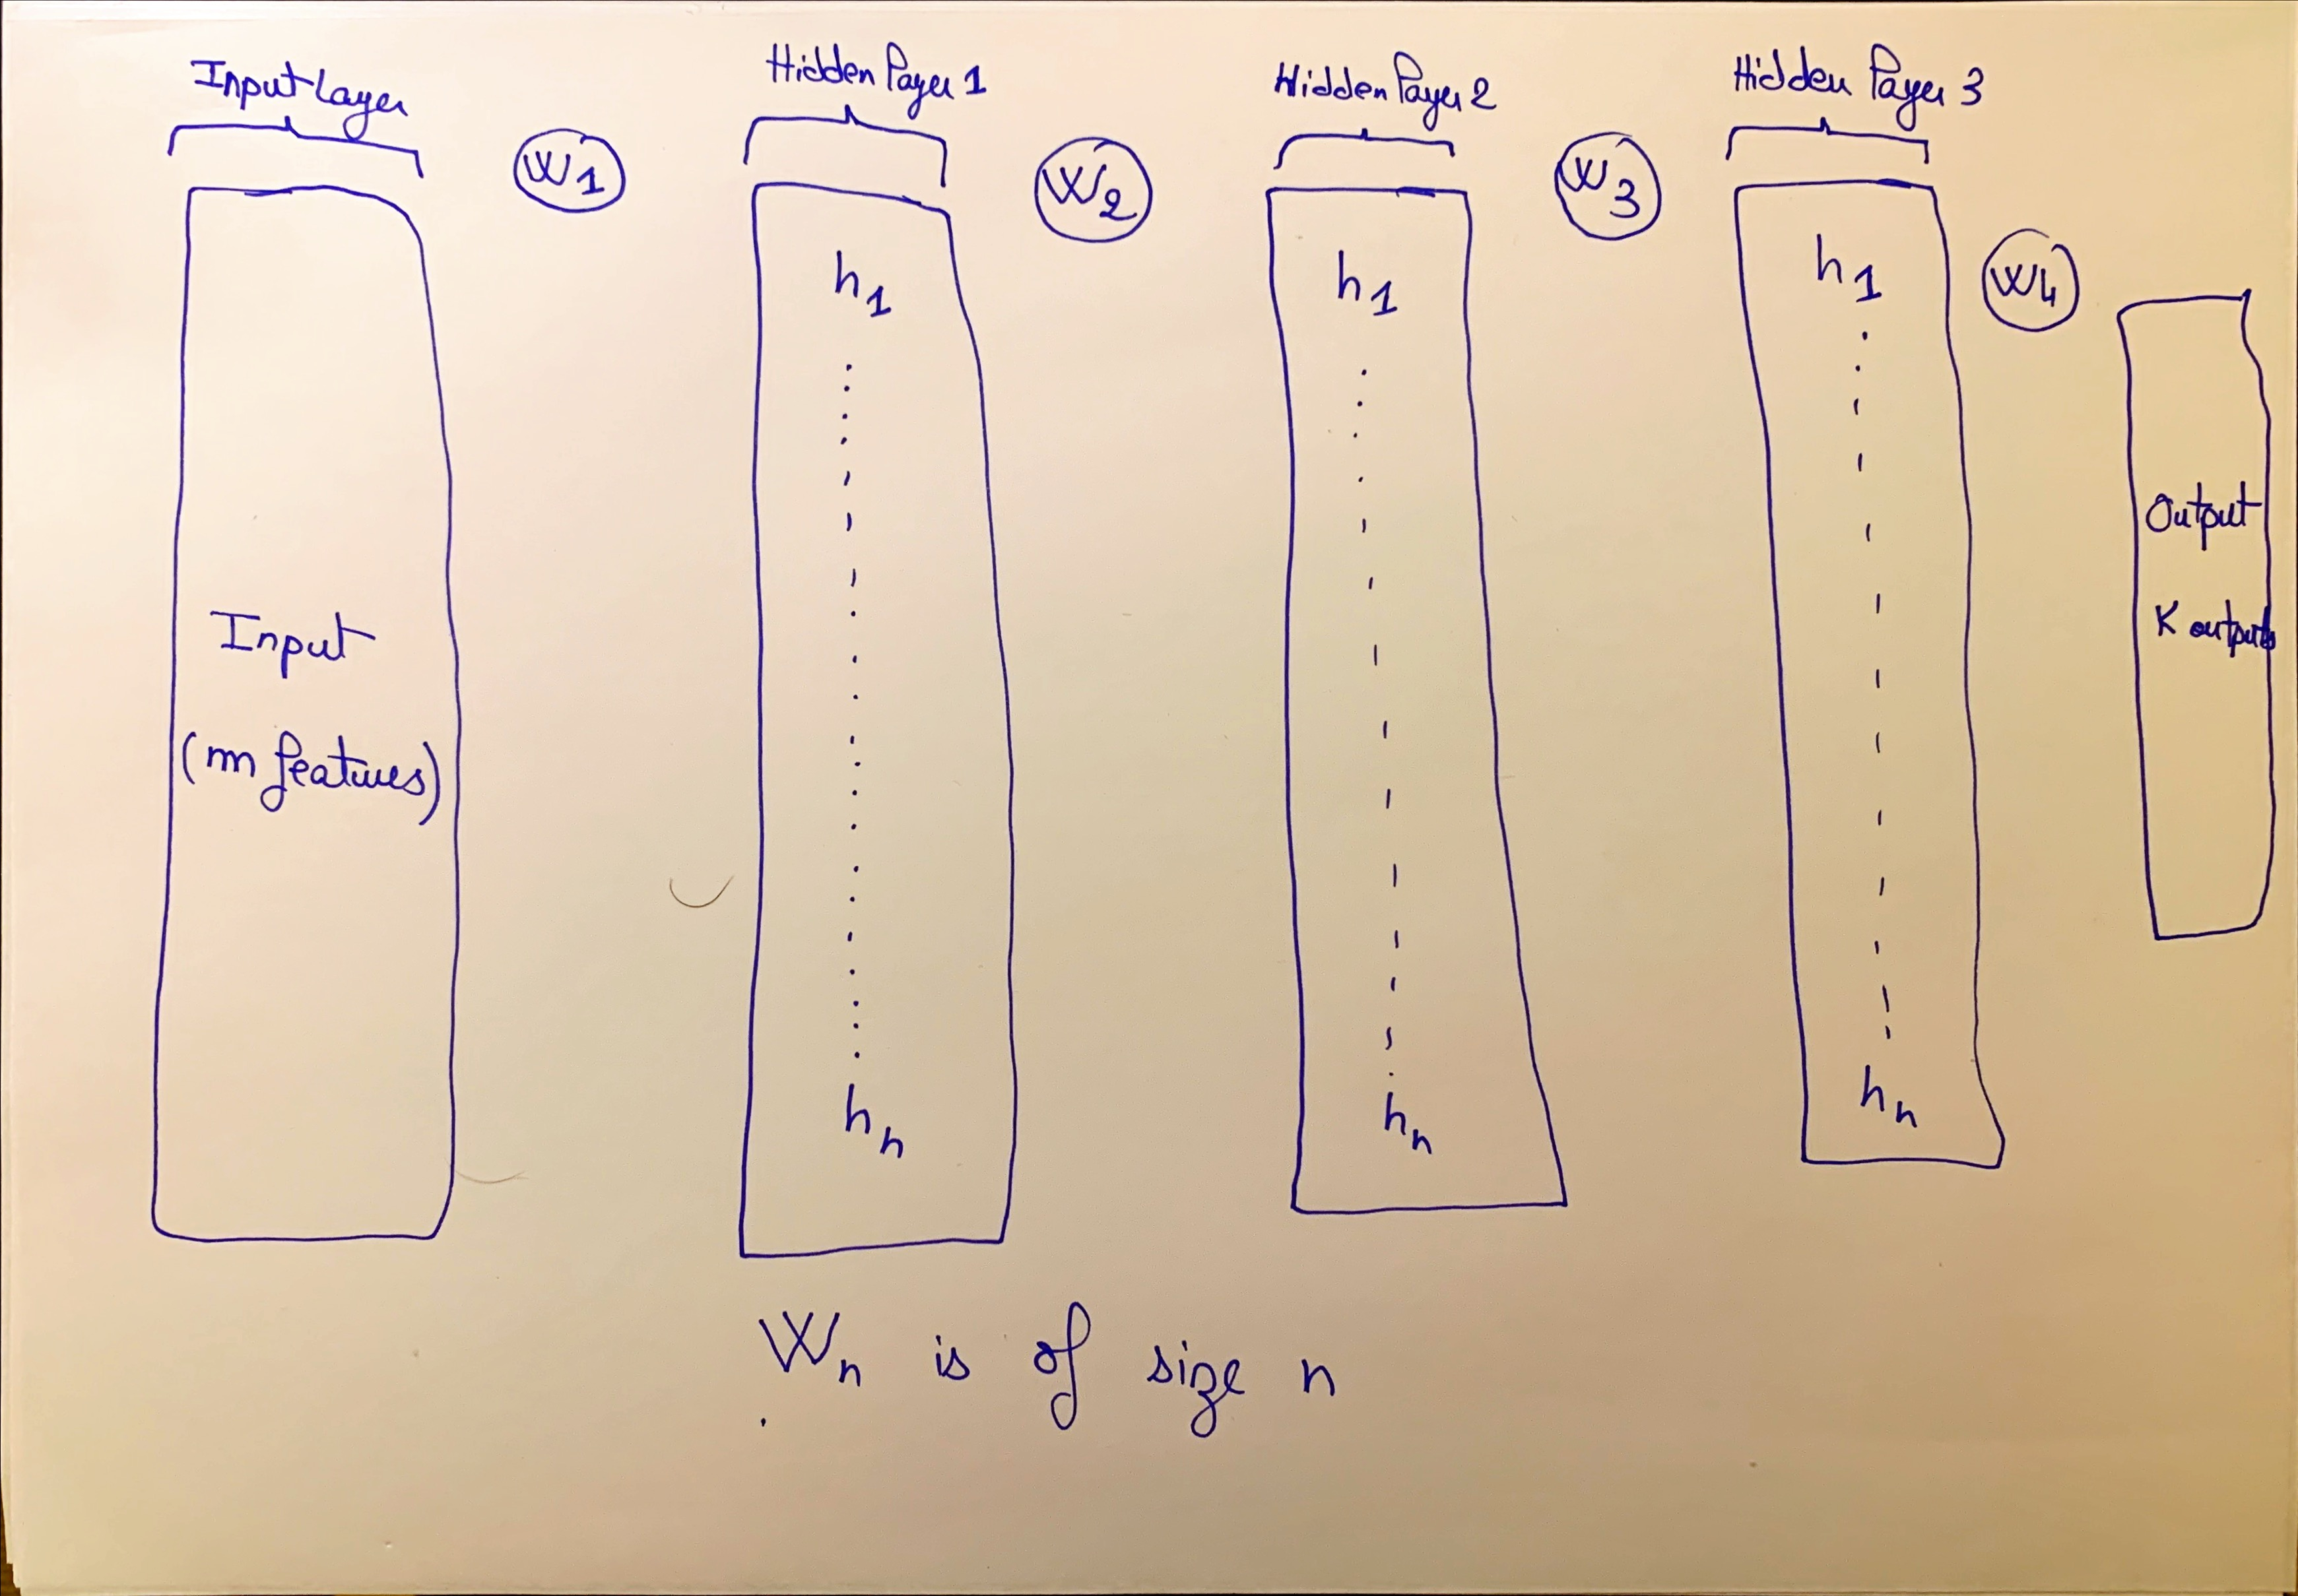

b)

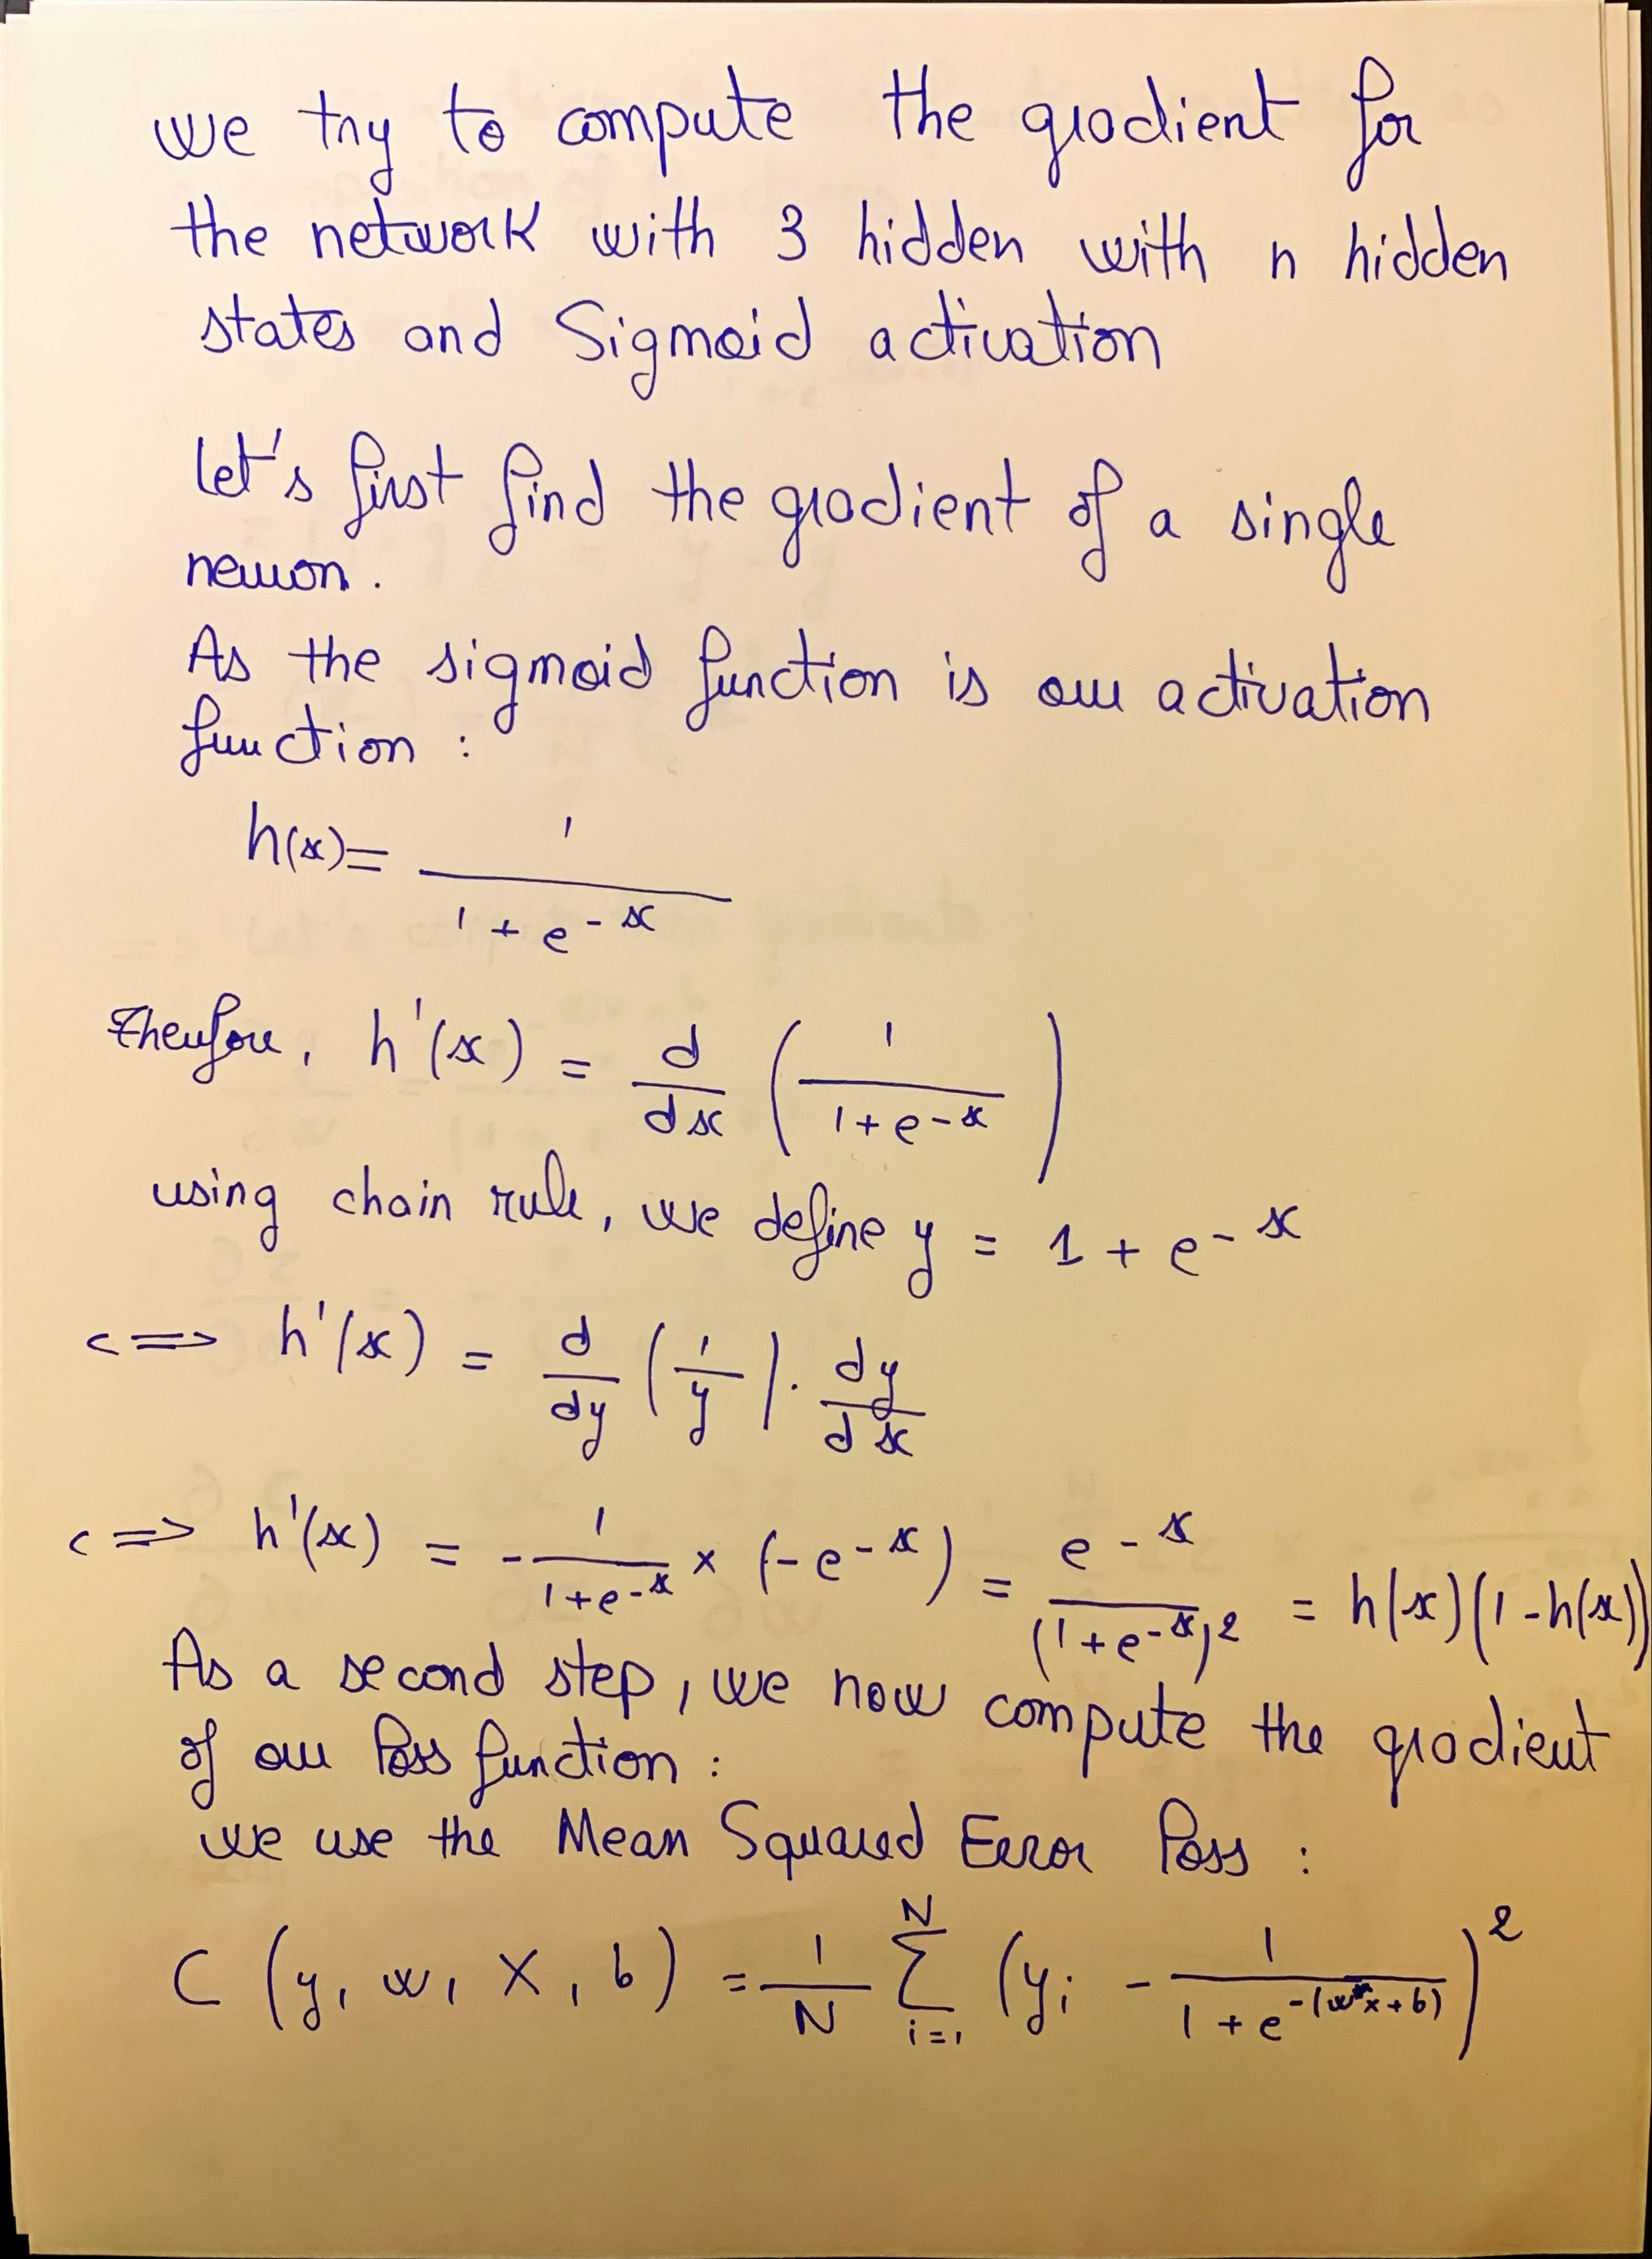

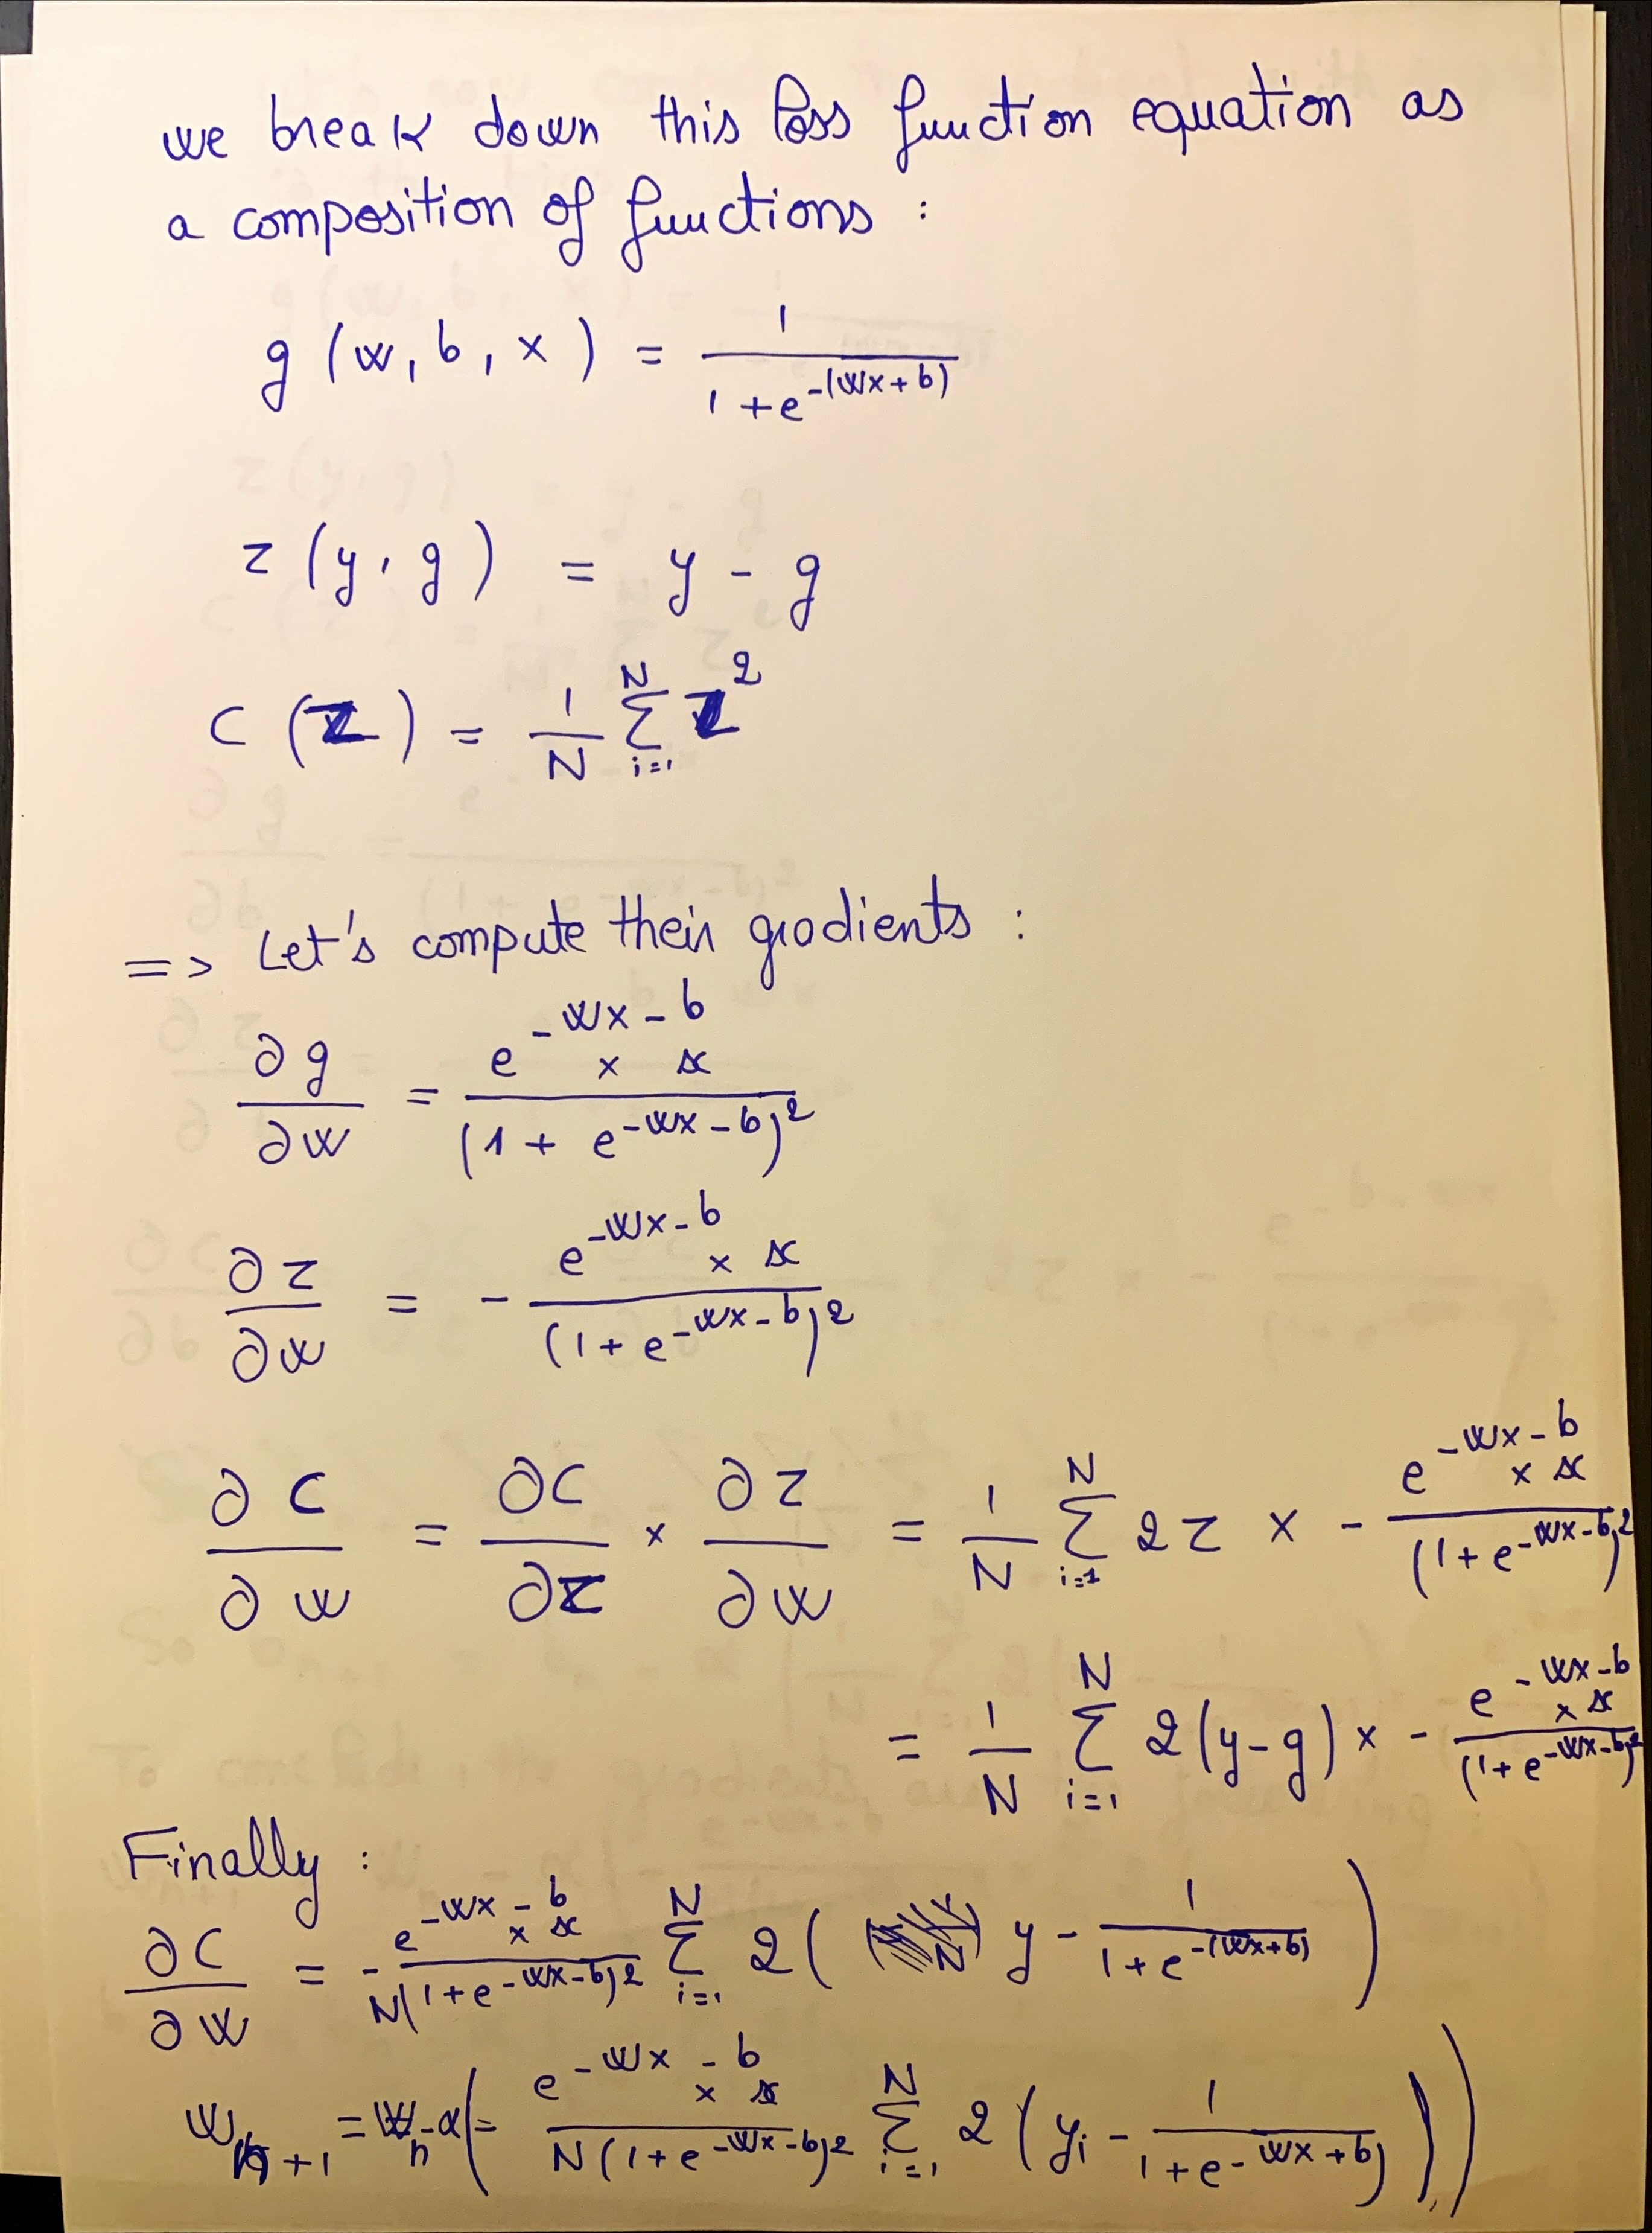

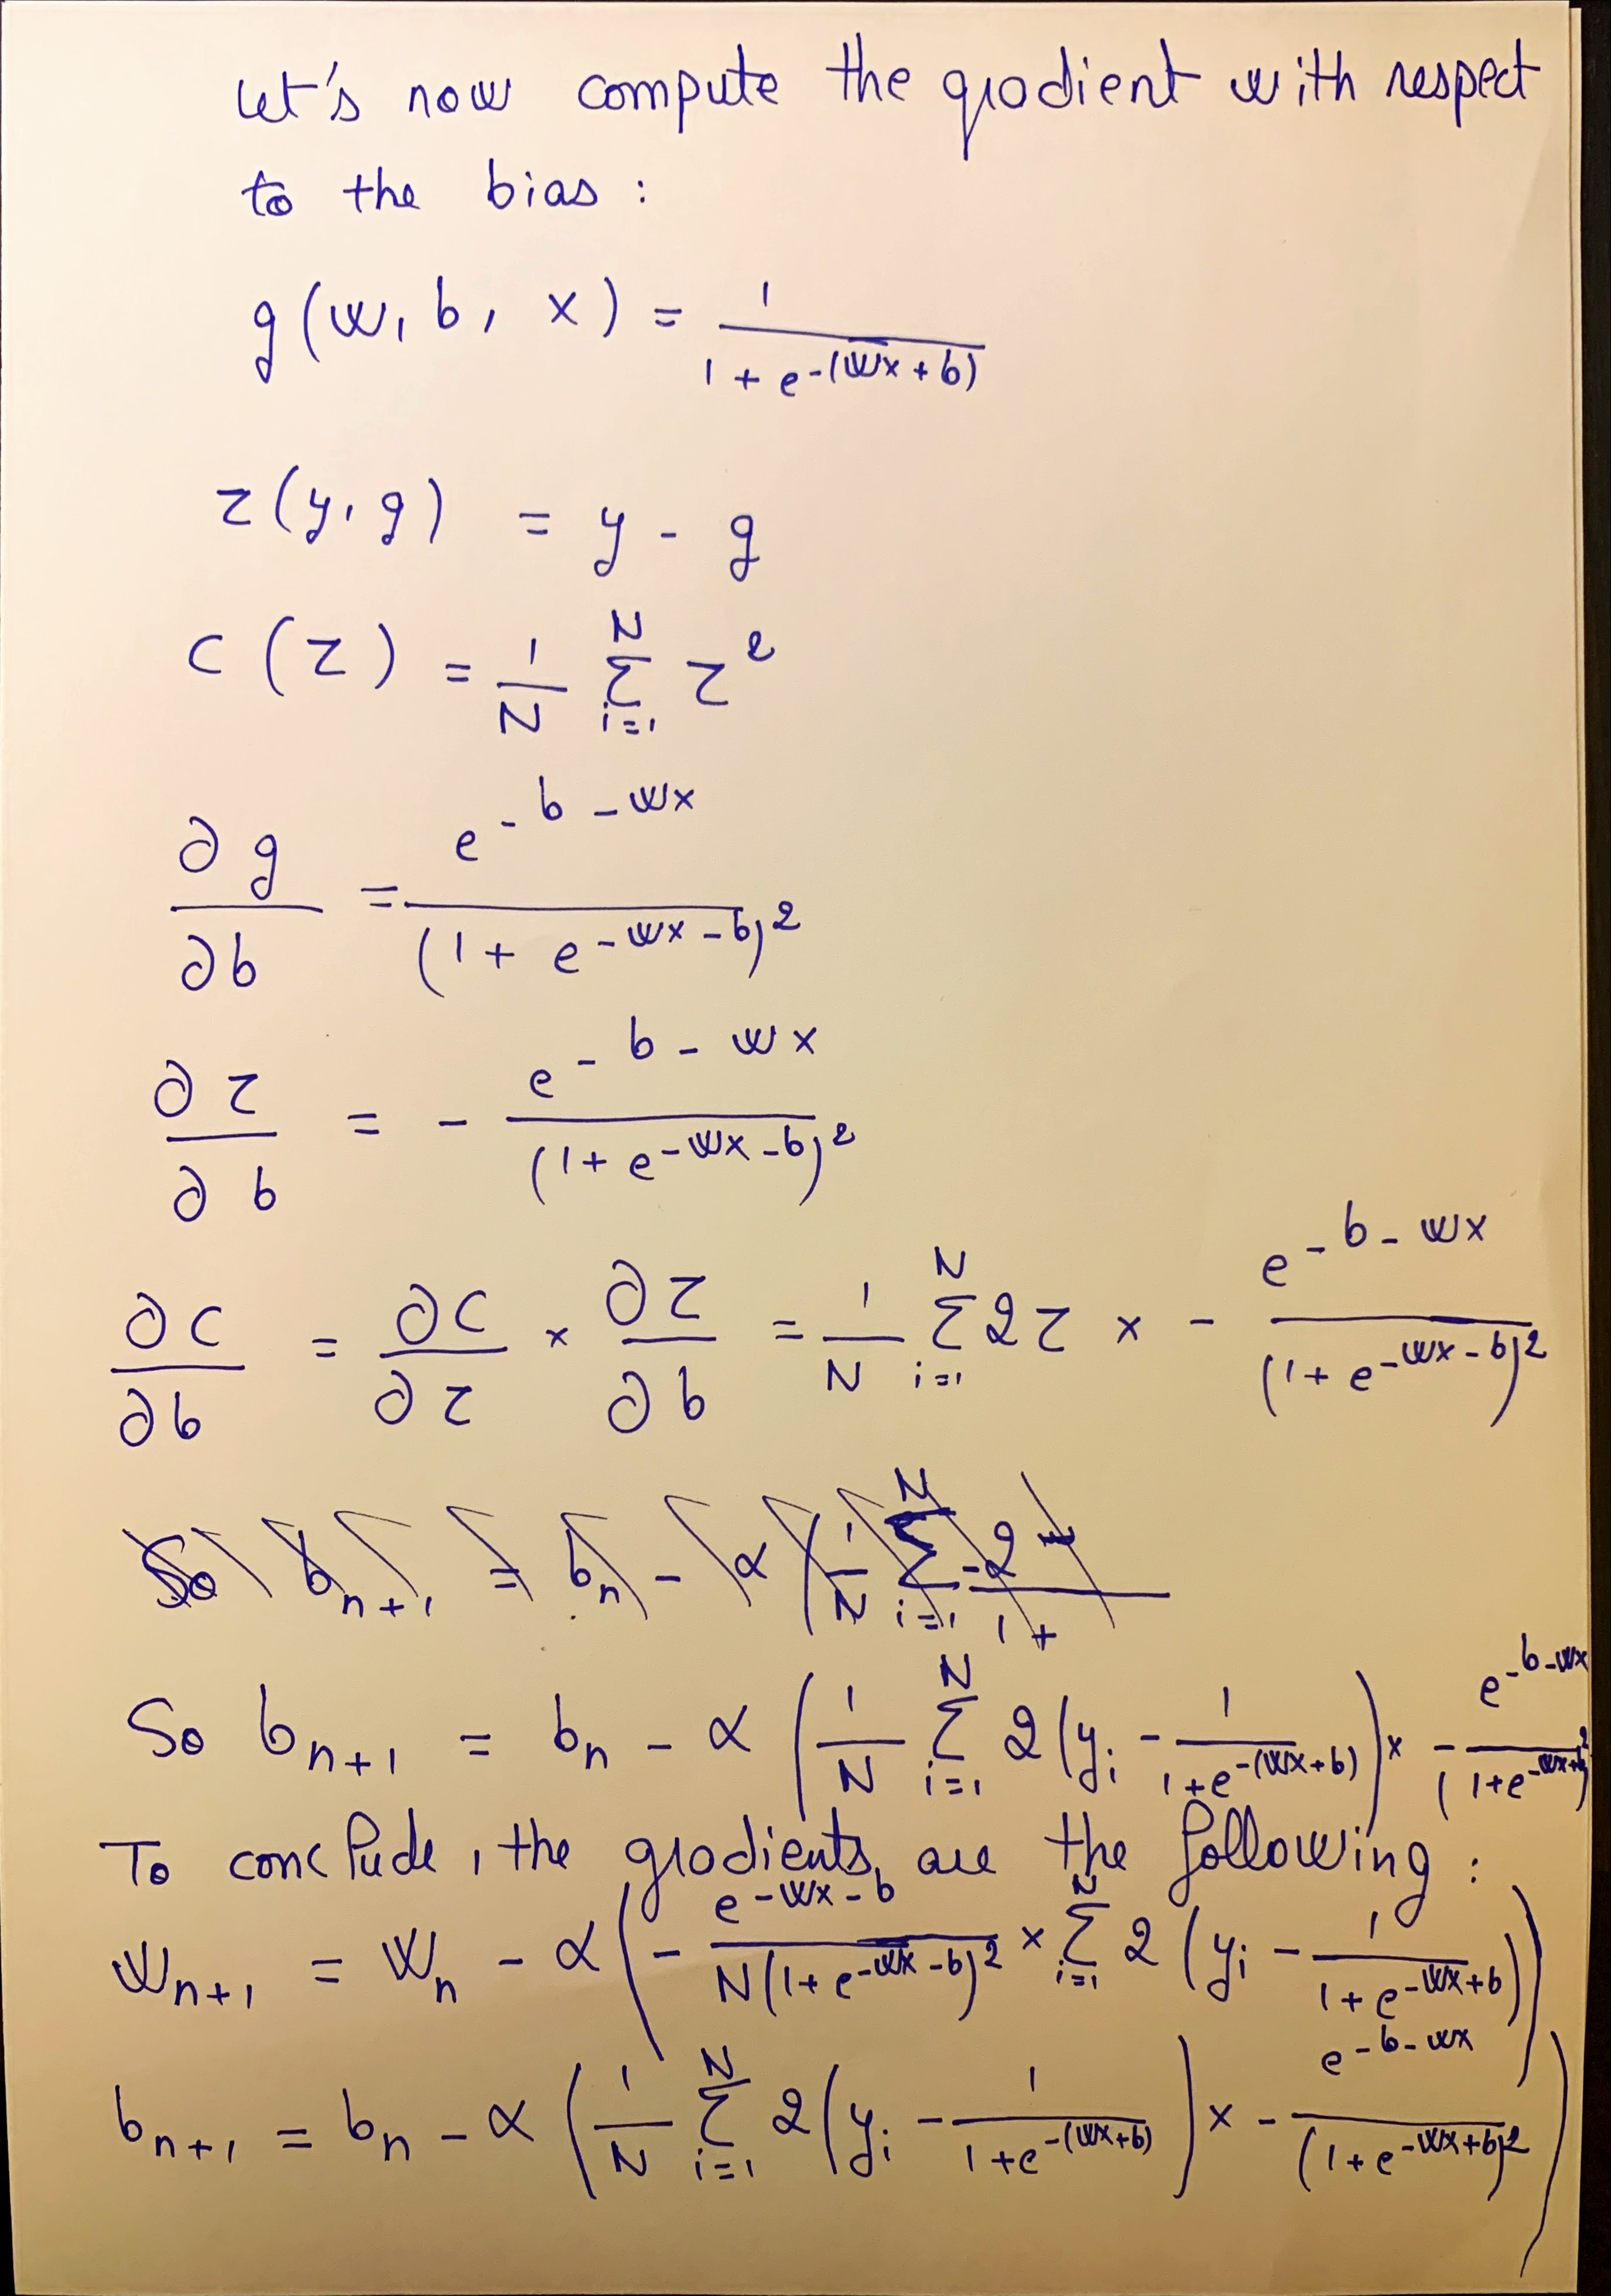